In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading dataset

In [2]:
adult = pd.read_csv("adult.csv",header = None)

### Assigning column names

In [3]:
adult.columns = ["Age","WorkClass","FinalWeight","Education",
                 "Education Number","Marital Status","Occupation",
                 "Relationship","Race","Sex","Capital Gain","Capital loss",
                 "Hours per week","Native Country","Income"]

### Viewing data

In [4]:
adult.head()

,Age,WorkClass,FinalWeight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital loss,Hours per week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Getting info

In [5]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   WorkClass         32561 non-null  object
 2   FinalWeight       32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education Number  32561 non-null  int64 
 5   Marital Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital Gain      32561 non-null  int64 
 11  Capital loss      32561 non-null  int64 
 12  Hours per week    32561 non-null  int64 
 13  Native Country    32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Viewing data values

In [6]:
for i in adult.columns:
    print(i)
    print(adult[f"{i}"].unique())
    print("*"*75)

Age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
***************************************************************************
WorkClass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
***************************************************************************
FinalWeight
[ 77516  83311 215646 ...  34066  84661 257302]
***************************************************************************
Education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
***************************************************************************
Education Number
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
*******

### Removing leading spaces from values

In [7]:
adult = adult.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [8]:
for i in adult.columns:
    print(i)
    print(adult[f"{i}"].unique())
    print("*"*75)

Age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
***************************************************************************
WorkClass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
***************************************************************************
FinalWeight
[ 77516  83311 215646 ...  34066  84661 257302]
***************************************************************************
Education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
***************************************************************************
Education Number
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
********************************

### Handling duplicates

In [9]:
adult.shape

(32561, 15)

In [10]:
adult.drop_duplicates(inplace = True)

In [11]:
adult.shape

(32537, 15)

### Imputation

In [12]:
adult["WorkClass"].value_counts()

WorkClass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [13]:
adult["WorkClass"].replace('?', np.nan , inplace=True)
mode_WorkClass = adult['WorkClass'].mode()[0]  
adult['WorkClass'].fillna(mode_WorkClass, inplace=True)

In [14]:
adult["WorkClass"].value_counts()

WorkClass
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [15]:
adult["Occupation"].value_counts()

Occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [16]:
adult["Occupation"].replace('?', np.nan , inplace=True)
mode_Occupation = adult['Occupation'].mode()[0]  
adult['Occupation'].fillna(mode_Occupation, inplace=True)

In [17]:
adult["Occupation"].value_counts()

Occupation
Prof-specialty       5979
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [18]:
adult["Native Country"].value_counts()

Native Country
United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [19]:
adult["Native Country"].replace('?', np.nan , inplace=True)
mode_NativeCountry = adult['Native Country'].mode()[0]  
adult['Native Country'].fillna(mode_NativeCountry, inplace=True)

In [20]:
adult["Native Country"].value_counts()

Native Country
United-States                 29735
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

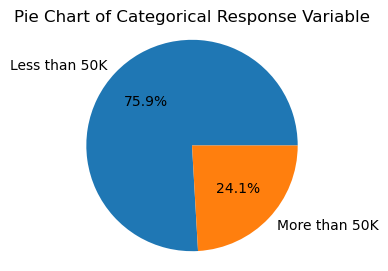

In [21]:
#Distribution of Response
# Calculate the frequency of each category in the response variable
response_counts = adult['Income'].value_counts()

response_labels = ['Less than 50K' if label == "<=50K" else 'More than 50K' for label in response_counts.index]

# Plot the pie chart with modified labels
plt.figure(figsize=(3, 3))
plt.pie(response_counts, labels=response_labels, autopct='%1.1f%%')
plt.title('Pie Chart of Categorical Response Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define features and target
Xo = adult.drop('Income', axis=1)
yo = adult['Income']

# Identify categorical and numerical features
categorical_features = Xo.select_dtypes(include=['object']).columns
numerical_features = Xo.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
X_preprocessed_o = preprocessor.fit_transform(Xo)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and testing sets
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_preprocessed_o, yo, test_size=0.3, random_state=123)

# Train a RandomForest model
model_o = RandomForestClassifier(random_state=42)
model_o.fit(X_train_o, y_train_o)

# Make predictions
y_pred_o = model_o.predict(X_test_o)

# Evaluate the model
print(classification_report(y_test_o, y_pred_o))
print('Accuracy:', accuracy_score(y_test_o, y_pred_o))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7380
        >50K       0.74      0.62      0.67      2382

    accuracy                           0.85      9762
   macro avg       0.81      0.77      0.79      9762
weighted avg       0.85      0.85      0.85      9762

Accuracy: 0.8537185003073141


In [25]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = adult[adult['Income'] == '<=50K']
minority = adult[adult['Income'] == '>50K']

# Upsample minority class
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=123)

# Combine majority class with upsampled minority class
balanced_data = pd.concat([majority, minority_upsampled])

# Display new class counts
print(balanced_data['Income'].value_counts())


Income
<=50K    24698
>50K     24698
Name: count, dtype: int64


In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define features and target
X = balanced_data.drop('Income', axis=1)
y = balanced_data['Income']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=123)

# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

       <=50K       0.96      0.89      0.92      7273
        >50K       0.90      0.97      0.93      7546

    accuracy                           0.93     14819
   macro avg       0.93      0.93      0.93     14819
weighted avg       0.93      0.93      0.93     14819

Accuracy: 0.9286051690397463
